# English Text Summerization

## Names: Moustafa Ayman, Fouad Mekky
## Reg. Num's: 221010727, 221000422

In [1]:
# 1. Import necessary libraries
import re
import pandas as pd
import spacy.cli
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from datasets import load_metric
from transformers import pipeline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
spacy.cli.download('en_core_web_sm')

# Load English NLP model
nlp = spacy.load("en_core_web_sm")


c:\Users\Pc\anaconda3\envs\DEEP_LEARNING\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
# 2. Load csv file
df = pd.read_csv("samsum-train.csv")


In [4]:
# 3. display the first 5 rows
df.head()

,id,dialogue,summary
0,13818513,Amanda: I baked cookies. Do you want some?\r\...,Amanda baked cookies and will bring Jerry some...
1,13728867,Olivia: Who are you voting for in this electio...,Olivia and Olivier are voting for liberals in ...
2,13681000,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...",Kim may try the pomodoro technique recommended...
3,13730747,"Edward: Rachel, I think I'm in ove with Bella....",Edward thinks he is in love with Bella. Rachel...
4,13728094,Sam: hey overheard rick say something\r\nSam:...,"Sam is confused, because he overheard Rick com..."


In [5]:
# Check if there are Null values 
df.isna().sum()

id          0
dialogue    1
summary     0
dtype: int64

In [6]:
# Check if there are duplicates values
df.duplicated().sum()

0

In [7]:
# Drop Null values 
df.dropna(inplace=True)

In [8]:
# Display a concise summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14731 entries, 0 to 14731
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        14731 non-null  object
 1   dialogue  14731 non-null  object
 2   summary   14731 non-null  object
dtypes: object(3)
memory usage: 460.3+ KB


In [9]:
# Generate descriptive statistics
df.describe()

,id,dialogue,summary
count,14731,14731,14731
unique,14731,14264,14729
top,13818513,"Jimmy: Hey, guess what? My car's completely ka...",Seth's pet Oreo that he got when he was 10 is ...
freq,1,4,2


In [11]:
# Apply the ".len" to know how many words in each row
df['dialogue_len'] = df.dialogue.apply(len)
df['summary_len'] = df.summary.apply(len)

### Visualization 

C:\Users\Pc\AppData\Local\Temp\ipykernel_17364\3109350293.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['dialogue_len'])
C:\Users\Pc\AppData\Local\Temp\ipykernel_17364\3109350293.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['summary_len'])


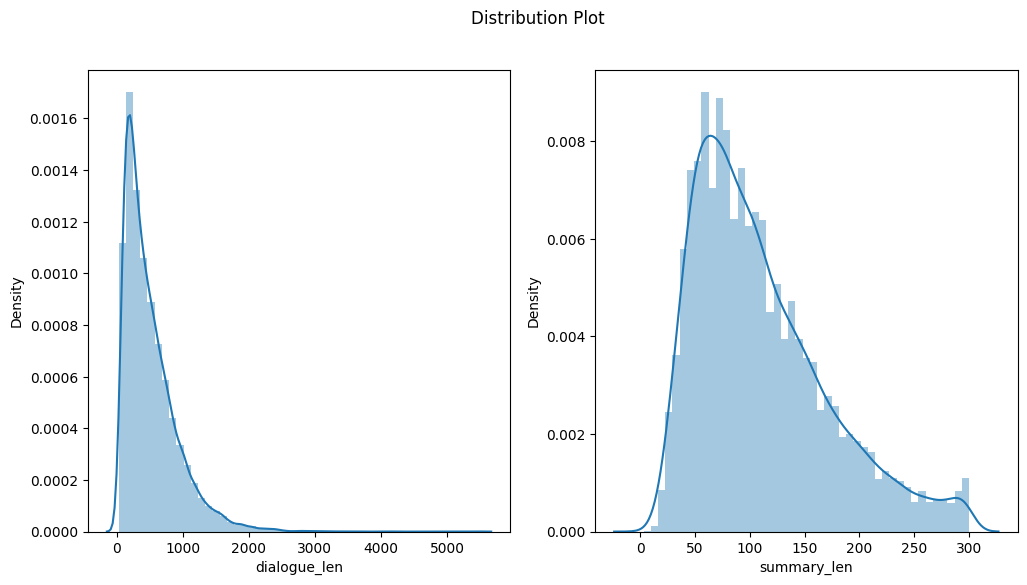

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
# Plot a distribution plot (histogram + KDE) for the 'dialogue_len' column
sns.distplot(df['dialogue_len']) 
plt.subplot(122)
# Plot a distribution plot for the 'summary_len' column
sns.distplot(df['summary_len'])
plt.suptitle('Distribution Plot')
# Display the combined plot
plt.show()

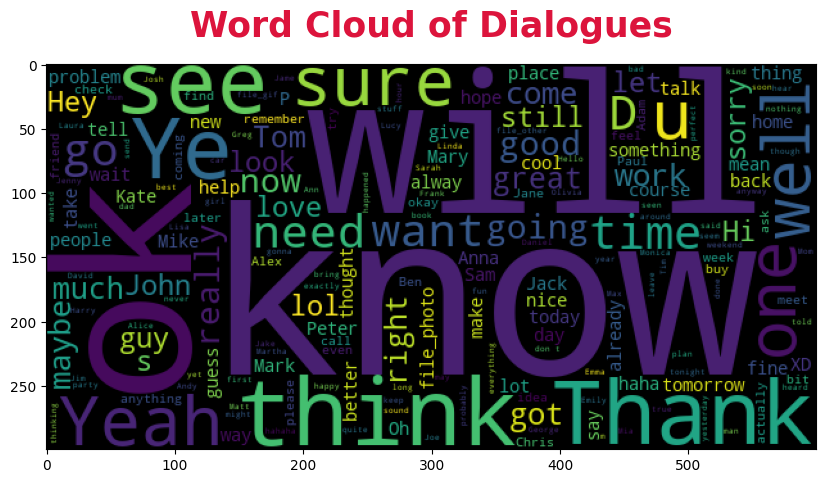

In [ ]:
plt.figure(figsize=(12, 5))
# Generate the word cloud from all dialogue text joined into a single string
wc = WordCloud(width=600, height=300, random_state=42).generate(' '.join(df.dialogue))
# Display the generated word cloud image
plt.imshow(wc)
# Add a title above the word cloud with specific font size, padding, color, and bold weight
plt.title('Word Cloud of Dialogues', fontsize=25, pad=20, color='crimson', fontweight='bold')
plt.axis('off')
# Show the complete plot
plt.show()

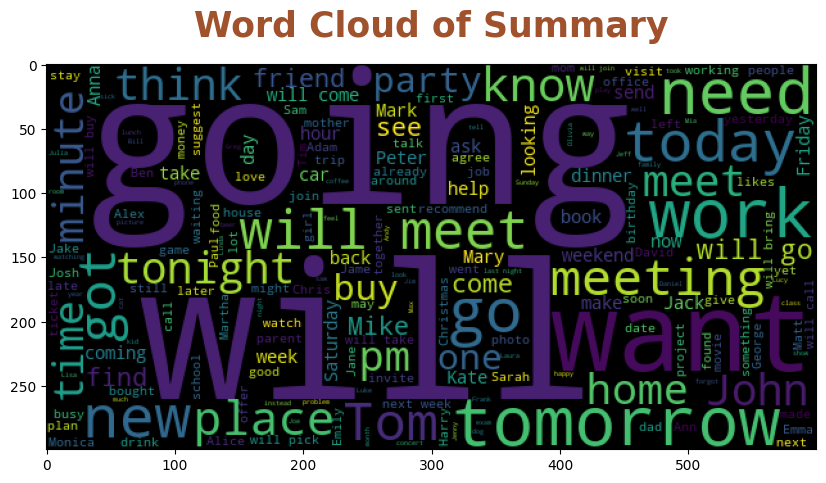

In [ ]:
plt.figure(figsize=(12, 5))
# Generate the word cloud from the 'summary' column by joining all text into one string
wc = WordCloud(width=600, height=300, random_state=42).generate(' '.join(df.summary))

# Display the generated word cloud as an image
plt.imshow(wc)
plt.title('Word Cloud of Summary', fontsize=25, pad=20, color='sienna', fontweight='bold')
plt.axis('off')

# Show the final plot
plt.show()

### Preprocessing

In [13]:
# Lowercasing function
def lowercase(text):
    doc = nlp(text.lower())
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

In [14]:
# Removing URLs 
def remove_url(text):
    pattern = r'https?://\S+|www\.\S+'
    return re.sub(pattern,'',text)

In [15]:
# Removing HTML Tags
def remove_html_tags(text):
    pattern = r'^a-zA-Z0-9\s'
    return re.sub(pattern,'',text)

In [16]:
# Removing Newlines
def remove_newlines(text):
    pattern = r'[\r\n]+'
    return re.sub(pattern, ' ', text)

### Applying the functions in dialogue colunm and add them to new column named "clean_dialogue"

In [20]:
df["clean_dialogue"] = df["dialogue"].apply(lowercase)

In [21]:
df["clean_dialogue"] = df["dialogue"].apply(remove_url)

In [22]:
df["clean_dialogue"] = df["dialogue"].apply(remove_html_tags)

In [23]:
df["clean_dialogue"] = df["dialogue"].apply(remove_newlines)

In [ ]:
# Display the first 5 rows
df.head()

,id,dialogue,summary,dialogue_len,summary_len,clean_dialogue
0,13818513,Amanda: I baked cookies. Do you want some?\r\...,Amanda baked cookies and will bring Jerry some...,94,56,Amanda: I baked cookies. Do you want some? Je...
1,13728867,Olivia: Who are you voting for in this electio...,Olivia and Olivier are voting for liberals in ...,111,61,Olivia: Who are you voting for in this electio...
2,13681000,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...",Kim may try the pomodoro technique recommended...,528,77,"Tim: Hi, what's up? Kim: Bad mood tbh, I was g..."
3,13730747,"Edward: Rachel, I think I'm in ove with Bella....",Edward thinks he is in love with Bella. Rachel...,155,97,"Edward: Rachel, I think I'm in ove with Bella...."
4,13728094,Sam: hey overheard rick say something\r\nSam:...,"Sam is confused, because he overheard Rick com...",909,145,Sam: hey overheard rick say something Sam: i ...


In [ ]:
# 3. Extractive Summarization with TF-IDF
def extractive_summary_tfidf(text, top_n=3):
    sentences = [sent.text for sent in nlp(text).sents]
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(sentences)
    scores = cosine_similarity(X, X).sum(axis=1)
    ranked_sentences = [sentences[i] for i in scores.argsort()[-top_n:][::-1]]
    return " ".join(ranked_sentences)


In [26]:
# Test on a sample
df_sample = df.sample(5, random_state=42)

In [27]:
df_sample["extractive_summary"] = df_sample["dialogue"].apply(extractive_summary_tfidf)

In [28]:
df_sample[["dialogue", "summary", "extractive_summary"]]

,dialogue,summary,extractive_summary
4742,Violet: hi! i came across this Austin's articl...,Violet sent Claire Austin's article.,i came across this Austin's article and i thou...
8871,"Mel: Right, it's time I bought some Christmas ...",Mel bought Christmas presents while Evie keeps...,Evie: Evie: Evie:
6555,Carol: Can you pls pick up when I call you.\r\...,"Fiona can't talk to Carol, because she's very ...",Carol: When can you talk?\r\n But to no avail....
12900,"Adam: Do u have a map of Paris?\r\nTom: Yes, W...",Tom has a map of Paris.,"Adam: No, it's for Lisa and her mum. Adam: Do ..."
2596,"Frank: Hi, how's the family?\r\nMike: great! S...","Mike is happy, because Sam's moved out. Mike a...","Frank: yes, I'd appreciate that Mike. Frank: s..."


### Using pre-trained model

In [ ]:
# 4. Abstractive Summarization with BART
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

def abstractive_summary(text):
    summary = summarizer(text[:1024], max_length=60, min_length=20, do_sample=False)
    return summary[0]["summary_text"]


Device set to use cpu
Your max_length is set to 60, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


,summary,extractive_summary,abstractive_summary
4742,Violet sent Claire Austin's article.,i came across this Austin's article and i thou...,Violet: hi! i came across this Austin's articl...
8871,Mel bought Christmas presents while Evie keeps...,Evie: Evie: Evie:,Evie says she's always been too soft. Mel: Wel...
6555,"Fiona can't talk to Carol, because she's very ...",Carol: When can you talk?\r\n But to no avail....,Carol: Been trying to reach you for the past f...
12900,Tom has a map of Paris.,"Adam: No, it's for Lisa and her mum. Adam: Do ...","Adam: Do u have a map of Paris? Tom: Yes, Why?..."
2596,"Mike is happy, because Sam's moved out. Mike a...","Frank: yes, I'd appreciate that Mike. Frank: s...",Frank and his wife are still not on speaking t...


In [ ]:
# Taking sample of "abstractive summary"
df_sample["abstractive_summary"] = df_sample["dialogue"].apply(abstractive_summary)

Your max_length is set to 60, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


In [ ]:
# Taking sample of all the dataset 
df_sample[["summary", "extractive_summary", "abstractive_summary"]]

,summary,extractive_summary,abstractive_summary
4742,Violet sent Claire Austin's article.,i came across this Austin's article and i thou...,Violet: hi! i came across this Austin's articl...
8871,Mel bought Christmas presents while Evie keeps...,Evie: Evie: Evie:,Evie says she's always been too soft. Mel: Wel...
6555,"Fiona can't talk to Carol, because she's very ...",Carol: When can you talk?\r\n But to no avail....,Carol: Been trying to reach you for the past f...
12900,Tom has a map of Paris.,"Adam: No, it's for Lisa and her mum. Adam: Do ...","Adam: Do u have a map of Paris? Tom: Yes, Why?..."
2596,"Mike is happy, because Sam's moved out. Mike a...","Frank: yes, I'd appreciate that Mike. Frank: s...",Frank and his wife are still not on speaking t...


### Evaluation 

In [ ]:
# 5. ROUGE Evaluation
rouge = load_metric("rouge")

refs = df_sample["summary"].tolist()
ext_preds = df_sample["extractive_summary"].tolist()
abs_preds = df_sample["abstractive_summary"].tolist()


C:\Users\Pc\AppData\Local\Temp\ipykernel_27496\1993673522.py:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge = load_metric("rouge")


In [33]:
# Compute ROUGE
rouge_ext = rouge.compute(predictions=ext_preds, references=refs)

In [34]:
rouge_abs = rouge.compute(predictions=abs_preds, references=refs)

In [35]:
# Display scores
print("Extractive ROUGE:")
for k, v in rouge_ext.items():
    print(f"{k}: {v.mid.fmeasure:.4f}")

Extractive ROUGE:
rouge1: 0.2255
rouge2: 0.0727
rougeL: 0.1967
rougeLsum: 0.1965


In [ ]:
#Display accuracy 
print("Abstractive ROUGE:")
for k, v in rouge_abs.items():
    print(f"{k}: {v.mid.fmeasure:.4f}")

Abstractive ROUGE:
rouge1: 0.2474
rouge2: 0.0926
rougeL: 0.1794
rougeLsum: 0.1776


In [ ]:
# 6. Display Sample Outputs
for i, row in df_sample.iterrows():
    print(f"\n--- Example {i} ---")
    print(" Original Dialogue:\n", row["dialogue"])
    print(" Human Summary:\n", row["summary"])
    print(" Extractive Summary:\n", row["extractive_summary"])
    print(" Abstractive Summary:\n", row["abstractive_summary"])


--- Example 4742 ---
 Original Dialogue:
 Violet: hi! i came across this Austin's article and i thought that you might find it interesting
Violet: <file_other>
Claire: Hi! :) Thanks, but I've already read it. :)
Claire: But thanks for thinking about me :)
 Human Summary:
 Violet sent Claire Austin's article.
 Extractive Summary:
 i came across this Austin's article and i thought that you might find it interesting
Violet: <file_other>
Claire: Hi! :) Thanks, but I've already read it. Claire: But thanks for thinking about me :)
 Abstractive Summary:
 Violet: hi! i came across this Austin's article and i thought that you might find it interesting. Violet: Hi! :) Thanks, but I've already read it.

--- Example 8871 ---
 Original Dialogue:
 Mel: Right, it's time I bought some Christmas presents otherwise I'll be totally stressed come the holidays. You sorted yet?
Evie: No way, I keep putting it off. You got a lot to buy?
Mel: Well yeah. My kids, the stepkids, nieces and nephews, Mum, Sis and